$$
\begin{equation}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0
\end{equation}
$$

$$
\begin{equation}
F = \rho u_{\rm max} \left(1-\frac{\rho}{\rho_{\rm max}}\right)
\end{equation}
$$


\begin{equation}
\rho(x,0) = \left\{
\begin{array}{cc}
\rho_{\rm max}\frac{x}{2} & 0 \leq x < 2  \\
0 & 2 \leq x \leq 4 \\
\end{array}
\right.
\end{equation}


In [16]:
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline 

In [17]:
np.set_printoptions(precision=3)
plt.style.use('dark_background')
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']='16'

In [18]:
def rho_green_light(x, rho_light):
    rho=np.zeros_like(x)
    mask=np.where(x<2.0)
    rho[mask]=rho_light*x[mask]/2
    return rho

In [19]:
nx=81
L=4
dx=L/(nx-1)
nt=30
CFL=np.array([0.1, 0.2, 0.3, 0.4, 1.0])
cases=np.size(CFL)
u_max=1.1
dt=CFL*dx/u_max
rho_max=10.0
rho_light=4.0
x=np.linspace(0.0, L, num=nx)
rho0=rho_green_light(x, rho_light)


In [20]:
np.size(CFL)

5

(-0.5, 11.0)

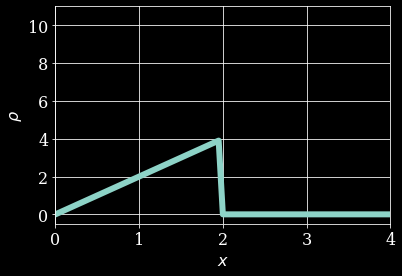

In [21]:
plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$\rho$')
plt.grid()
plt.plot(x, rho0, color='C0', linestyle='-', linewidth=6)
plt.xlim(0.0, L)
plt.ylim(-0.5, 11.0)

In [22]:
def flux(rho, u_max, rho_max):
    F=rho*u_max*(1-rho/rho_max)
    return F

In [23]:
def FortBacs(rho1, u_max, rho_max, CFL0, nt):
    for n in range(nt-1):
        F=flux(rho1[n], u_max, rho_max)
        rho1[n+1,0]=rho1[n,0]-CFL0/u_max*(F[0]-F[-1])
        rho1[n+1,1:]=rho1[n,1:]-/u_max*CFL0*(F[1:]-F[0:-1])
    return rho1

SyntaxError: invalid syntax (<ipython-input-23-452b087b9750>, line 5)

In [24]:
rho_values=[]
for CFL0 in CFL:
    rho1=np.empty((nt, nx))
    rho1[0]=rho0
    rho1=FortBacs(rho1, u_max, rho_max, CFL0, nt)
    rho_values.append(rho1)

In [25]:
stackrho_values=rho_values[0]
for n in range(cases-1):
    stackrho_values=np.vstack((stackrho_values, rho_values[n+1]))

In [26]:
from matplotlib import animation
from IPython.display import HTML

(-0.5, 11.0)

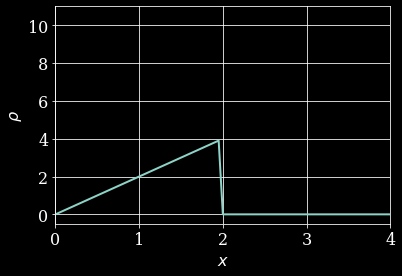

In [27]:
fig = plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$\rho$')
plt.grid()
line = plt.plot(x, rho_values[0][0,:],
                    color='C0', linestyle='-', linewidth=2)[0]
plt.xlim(0.0, L)
plt.ylim(-0.5, 11.0)

In [28]:
def update_plot(n, stackrho_values):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(stackrho_values[n,:])

In [29]:
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt*5, fargs=(stackrho_values,),
                               interval=100)
# Display the video.
HTML(anim.to_html5_video())